## 5.11 Final Project Assignment
## Group 2
## Seth Galluzzi (vzw6yk), Max Jones (maj3js), Said Mrad (sm2yk)

## Data Gathering

In [1]:
import pandas as pd

## Appends each year's defensive dataframe into a list
DF_list = [pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/defense/' + str(i) + '.csv') 
           for i in range(1966, 2020)] 

In [2]:
year = 1966

## Creates new identifying "year" column for each year's dataframe
for i in range(0,54):
    DF_list[i]['Year'] = year
    year += 1

In [3]:
## Merges each year's dataframe into one dataframe
df_all = pd.concat(DF_list)

In [4]:
## Removes unnecessary columns
df_all = df_all.drop(columns='Unnamed: 0')

In [5]:
## Write to github repo

df_all.to_csv("df_all.csv")

### General Overview of Data Set

#### This data set contains various statistics for NFL defenses from 1966-2019

In [6]:
df_all

,Tm,PointsAllowed,TotalYardsAllowed,OffensivePlaysAllowed,YardsPerPlay,TO,ForcedFumbles,TotalFirstDownsAllowed,Cmp,PassingAttAllowed,...,StandardReceivingDefRank,RushingDefRank,PPRFantasyPointsAllowed,PPRDefRank,HalfPPRFantasyPointsAllowed,HalfPPRDefRank,StandardFantasyPointsAllowed,StandardDefRank,Year,EXP
0,Green Bay Packers,163.0,3603.0,883.0,4.1,42.0,14.0,211.0,202.0,390.0,...,1.0,5.0,680.66,1.0,579.66,1.0,478.66,1.0,1966,NaN
1,Los Angeles Rams,212.0,3771.0,852.0,4.4,46.0,20.0,196.0,190.0,406.0,...,7.0,2.0,763.86,2.0,668.86,2.0,573.86,2.0,1966,NaN
2,Baltimore Colts,226.0,4091.0,932.0,4.4,40.0,18.0,245.0,240.0,425.0,...,4.0,4.0,845.42,6.0,725.42,6.0,605.42,5.0,1966,NaN
3,Dallas Cowboys,239.0,3558.0,873.0,4.1,31.0,14.0,221.0,212.0,457.0,...,8.0,1.0,807.08,4.0,701.08,4.0,595.08,3.0,1966,NaN
4,Cleveland Browns,259.0,4266.0,891.0,4.8,49.0,19.0,255.0,221.0,406.0,...,6.0,9.0,856.48,7.0,745.98,7.0,635.48,7.0,1966,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Arizona Cardinals,442.0,6432.0,1080.0,6.0,17.0,10.0,375.0,421.0,601.0,...,32.0,13.0,1644.60,32.0,1434.10,32.0,1223.60,31.0,2019,-174.55
28,Tampa Bay Buccaneers,449.0,5503.0,1073.0,5.1,28.0,16.0,331.0,408.0,664.0,...,28.0,1.0,1441.18,24.0,1237.18,23.0,1033.18,19.0,2019,12.23
29,New York Giants,451.0,6037.0,1061.0,5.7,16.0,6.0,343.0,369.0,556.0,...,26.0,25.0,1523.70,27.0,1339.20,28.0,1154.70,28.0,2019,-105.11
30,Carolina Panthers,470.0,5992.0,1042.0,5.8,21.0,7.0,355.0,347.0,544.0,...,12.0,32.0,1448.04,25.0,1274.54,25.0,1101.04,24.0,2019,-116.88


### Number of records

In [7]:
df_all.shape[0]

1540

### Number of columns

In [8]:
len([i for i in df_all])

43

### Total columns for consideration

In [9]:
[i for i in df_all]

['Tm',
 'PointsAllowed',
 'TotalYardsAllowed',
 'OffensivePlaysAllowed',
 'YardsPerPlay',
 'TO',
 'ForcedFumbles',
 'TotalFirstDownsAllowed',
 'Cmp',
 'PassingAttAllowed',
 'PassingYardsAllowed',
 'PassingTDAllowed',
 'Int',
 'NetYardsAllowedPerPass',
 'PassingFirstDownsAllowed',
 'RushingAttAllowed',
 'RushingYdsAllowed',
 'RushingTDAllowed',
 'YardsPerRushAllowed',
 'RushingFirstDownsAllowed',
 'PenaltiesCommitted',
 'PenaltyYardsAllowed',
 'FirstDownsViaPenalty',
 'PercentageOfDrivesEndingInOffensiveScores',
 'PercentDrivesEndingInTO',
 'PassingFantasyPointsAllowed',
 'PPRReceivingFantasyPointsAllowed',
 'HalfPPRReceivingFantasyPointsAllowed',
 'StandardReceivingFantasyPointsAllowed',
 'RushingFantasyPointsAllowed',
 'PassingDefRank',
 'PPRReceivingDefRank',
 'HalfPPRReceivingDefRank',
 'StandardReceivingDefRank',
 'RushingDefRank',
 'PPRFantasyPointsAllowed',
 'PPRDefRank',
 'HalfPPRFantasyPointsAllowed',
 'HalfPPRDefRank',
 'StandardFantasyPointsAllowed',
 'StandardDefRank',
 'Yea

### Statistical summary of response variable

#### We will predict on PPRFantasy Points Allowed to rank defenses. We will need to do some slight data manipulation here--currently, each row contains a team's PPR Fantasy Points Allowed for how their corresponding seasonal statistics turned out, but we want to predict how their stats relate to the next season. To do so, we will need to move each PPR Fantasy Points Allowed up a row (we want the 1966 season data to predict 1967 final standings, for example, not the 1966 final standings), and we will need to find or manually add the 2020 final standings to add to the 2019 season data

In [10]:
df_all['PPRFantasyPointsAllowed'].describe()

count    1540.000000
mean     1132.555753
std       210.978349
min       449.280000
25%      1008.215000
50%      1155.090000
75%      1283.805000
max      1693.260000
Name: PPRFantasyPointsAllowed, dtype: float64

### Statistical summary of potential predictor variables (top 10)

#### We have over 30 potential predictor variables. Currently, we estimate that these will be the most influential

In [11]:
df_all['PointsAllowed'].describe()

count    1540.000000
mean      324.203896
std        68.499304
min       128.000000
25%       282.000000
50%       325.000000
75%       372.000000
max       533.000000
Name: PointsAllowed, dtype: float64

In [12]:
df_all['TotalYardsAllowed'].describe()

count    1540.000000
mean     4986.421429
std       735.197734
min      2312.000000
25%      4577.500000
50%      5083.500000
75%      5487.000000
max      7042.000000
Name: TotalYardsAllowed, dtype: float64

In [13]:
df_all['OffensivePlaysAllowed'].describe()

count    1540.000000
mean      983.578571
std        90.014956
min       531.000000
25%       950.000000
50%      1000.000000
75%      1040.000000
max      1159.000000
Name: OffensivePlaysAllowed, dtype: float64

In [14]:
df_all['YardsPerPlay'].describe()

count    1540.000000
mean        5.056299
std         0.480165
min         3.400000
25%         4.700000
50%         5.100000
75%         5.400000
max         6.600000
Name: YardsPerPlay, dtype: float64

In [15]:
df_all['TO'].describe()

count    1540.000000
mean       30.619481
std         8.282497
min         7.000000
25%        25.000000
50%        30.000000
75%        36.000000
max        63.000000
Name: TO, dtype: float64

In [16]:
df_all['ForcedFumbles'].describe()

count    1540.000000
mean       13.038312
std         4.544541
min         2.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        28.000000
Name: ForcedFumbles, dtype: float64

In [17]:
df_all['TotalFirstDownsAllowed'].describe()

count    1540.000000
mean      287.955844
std        41.458552
min       147.000000
25%       266.000000
50%       293.000000
75%       316.000000
max       419.000000
Name: TotalFirstDownsAllowed, dtype: float64

In [18]:
df_all['Cmp'].describe()

count    1540.000000
mean      284.021429
std        62.173646
min       114.000000
25%       247.000000
50%       294.000000
75%       328.000000
max       425.000000
Name: Cmp, dtype: float64

In [19]:
df_all['PassingAttAllowed'].describe()

count    1540.000000
mean      491.311039
std        80.959604
min       226.000000
25%       449.000000
50%       509.000000
75%       547.000000
max       670.000000
Name: PassingAttAllowed, dtype: float64

In [20]:
df_all['PassingTDAllowed'].describe()

count    1540.000000
mean       20.572727
std         5.982151
min         4.000000
25%        16.000000
50%        20.000000
75%        25.000000
max        45.000000
Name: PassingTDAllowed, dtype: float64

### Helpful Visualizing Graphs

#### 1. As the game has changed, passing producion especially has increased, as we can see from how completions have trended upward continually. This has largely been due to gameplay changes, but part of it is due to the number of games increasing over time. To account for this in our modeling, we will need to adjust each stat into a per-game basis instead of per-season

Text(0.5, 1.0, 'Completions Against Year')

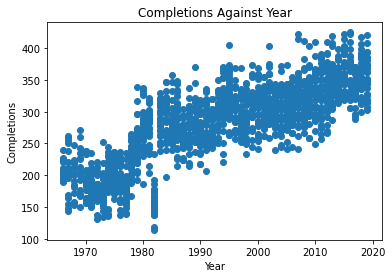

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df_all['Year'], df_all['Cmp'])
plt.xlabel("Year")
plt.ylabel("Completions")
plt.title("Year versus Completions Scatterplot")

#### 2. Looking at our response variable across time, a couple things stand out. One, this seems to correlate pretty well with the pattern of completions increasing over time, and two, the season around 1982 appears to be an outlier--think this may be the strike season. Even after adjusting with per game statistics, we may still wish to simply remove this season from consideration

Text(0, 0.5, 'PPRFantasyPointsAllowed')

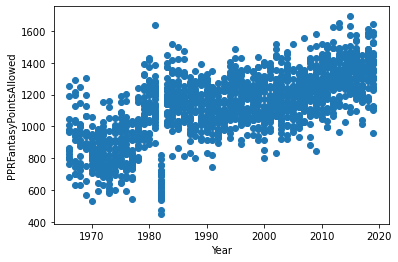

In [22]:
plt.scatter(df_all['Year'], df_all['PPRFantasyPointsAllowed'])
plt.xlabel("Year")
plt.ylabel("PPRFantasyPointsAllowed")
plt.title('Year vs. Fantasy Points Allowed (PPR) Scatterplot')

#### 3. Interestingly, turnovers have decreased over time, even without adjusting on a per-game basis. 

Text(0, 0.5, 'Turnovers')

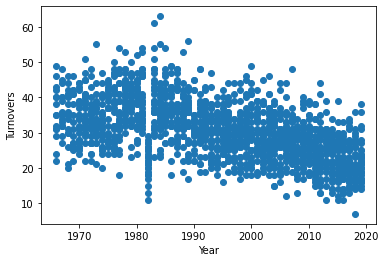

In [23]:
plt.scatter(df_all['Year'], df_all['TO'])
plt.xlabel("Year")
plt.ylabel("Turnovers")
plt.title('Year versus Turnovers Scatterplot')

#### And, as we would expect, the more turnovers a team has, the fewer fantasy points they would have allowed

Text(0, 0.5, 'PPRFantasyPointsAllowed')

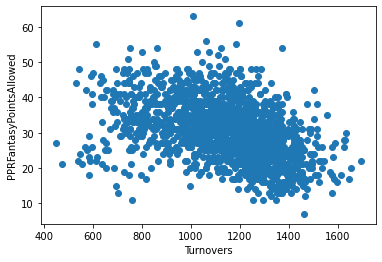

In [24]:
plt.scatter(df_all['PPRFantasyPointsAllowed'], df_all['TO'])
plt.xlabel("Turnovers")
plt.ylabel("PPRFantasyPointsAllowed")
plt.title('Turnovers versus Fantasy Points Allowed (PPR) Scatterplot')

#### 4. Confirming our thoughts, while passing yards have increased quite a bit over time, rushing yards have remained just about stagnant.

Text(0, 0.5, 'Rushing Yards Allowed')

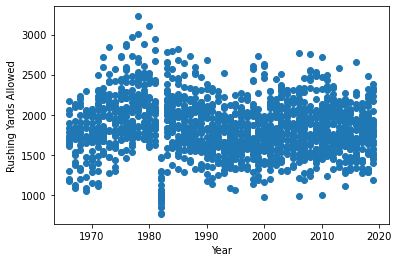

In [25]:
plt.scatter(df_all['Year'], df_all['RushingYdsAllowed'])
plt.xlabel("Year")
plt.ylabel("Rushing Yards Allowed")
plt.title('Year versus Rushing Yards Allowed Scatterplot')

Text(0, 0.5, 'Passing Yards Allowed')

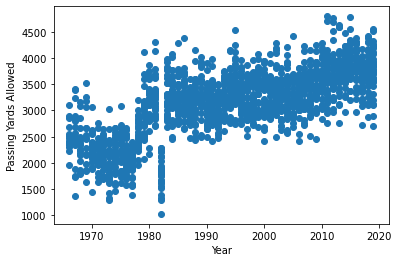

In [26]:
plt.scatter(df_all['Year'], df_all['PassingYardsAllowed'])
plt.xlabel("Year")
plt.ylabel("Passing Yards Allowed")
plt.title('Year versus Passing Yards Allowed Scatterplot')

#### And looking at PPR Fantasy Points Allowed, the rushing yards allowed has a much higher spread, while the passing yards allowed is very close together. We would expect passing yards to have a more precise effect in our model compared to rushing yards

Text(0, 0.5, 'PPRFantasyPointsAllowed')

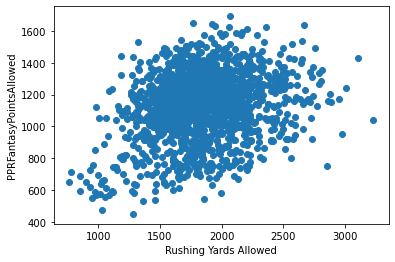

In [27]:
plt.scatter(df_all['RushingYdsAllowed'], df_all['PPRFantasyPointsAllowed'])
plt.xlabel("Rushing Yards Allowed")
plt.ylabel("PPRFantasyPointsAllowed")
plt.title('Rushing Yards Allowed versus Fantasy Points (PPR) Scatterplot')

Text(0, 0.5, 'PPRFantasyPointsAllowed')

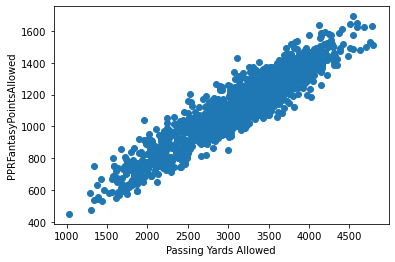

In [28]:
plt.scatter(df_all['PassingYardsAllowed'], df_all['PPRFantasyPointsAllowed'])
plt.xlabel("Passing Yards Allowed")
plt.ylabel("PPRFantasyPointsAllowed")
plt.title('Passing Yards Allowed versus Fantasy Points Allowed (PPR) Scatterplot')

#### 5. Getting a bit more granular, we were interested in how passing first downs might affect Fantasy PPR points allowed, and this correlated almost perfectly with passing yards allowed. We thought there might be some variation here, but all the information in passing first downs allowed stat for predicting PPRFantasyPointsAllowed is likely contained in the Passing Yards Allowed stat, so we do not expect it to be significant.

Text(0, 0.5, 'PPRFantasyPointsAllowed')

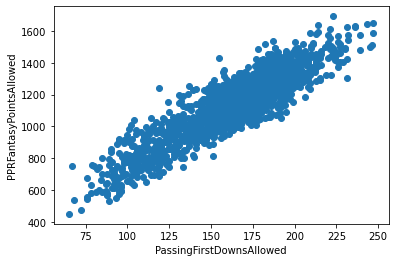

In [29]:
plt.scatter(df_all['PassingFirstDownsAllowed'], df_all['PPRFantasyPointsAllowed'])
plt.xlabel("PassingFirstDownsAllowed")
plt.ylabel("PPRFantasyPointsAllowed")
plt.title('Passing Yards Allowed versus Fantasy Points Allowed (PPR) Scatterplot')

### Next Steps

Next, we will want to create our new PPRFantasyPointsAllowed stat to predict on future seasons, and from there, we should be ready to create and test out regression models